<a href="https://colab.research.google.com/github/yeekha89/Assignment-Submmissions/blob/main/Homework7_16_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Fashion-MNIST data
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, y_train.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
# Import visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

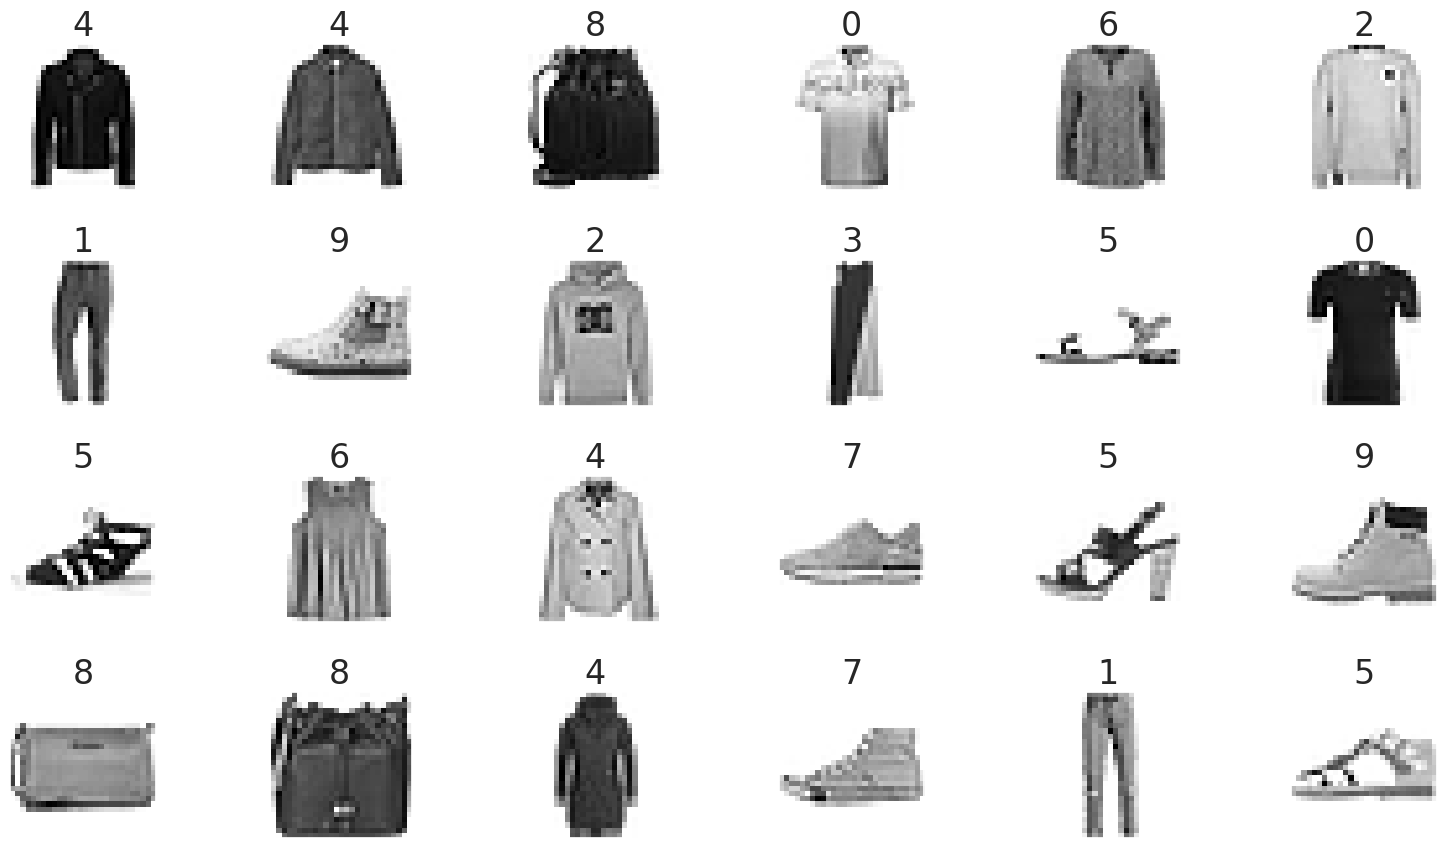

In [8]:
# Plot image
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

In [9]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [11]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [13]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [14]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [15]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

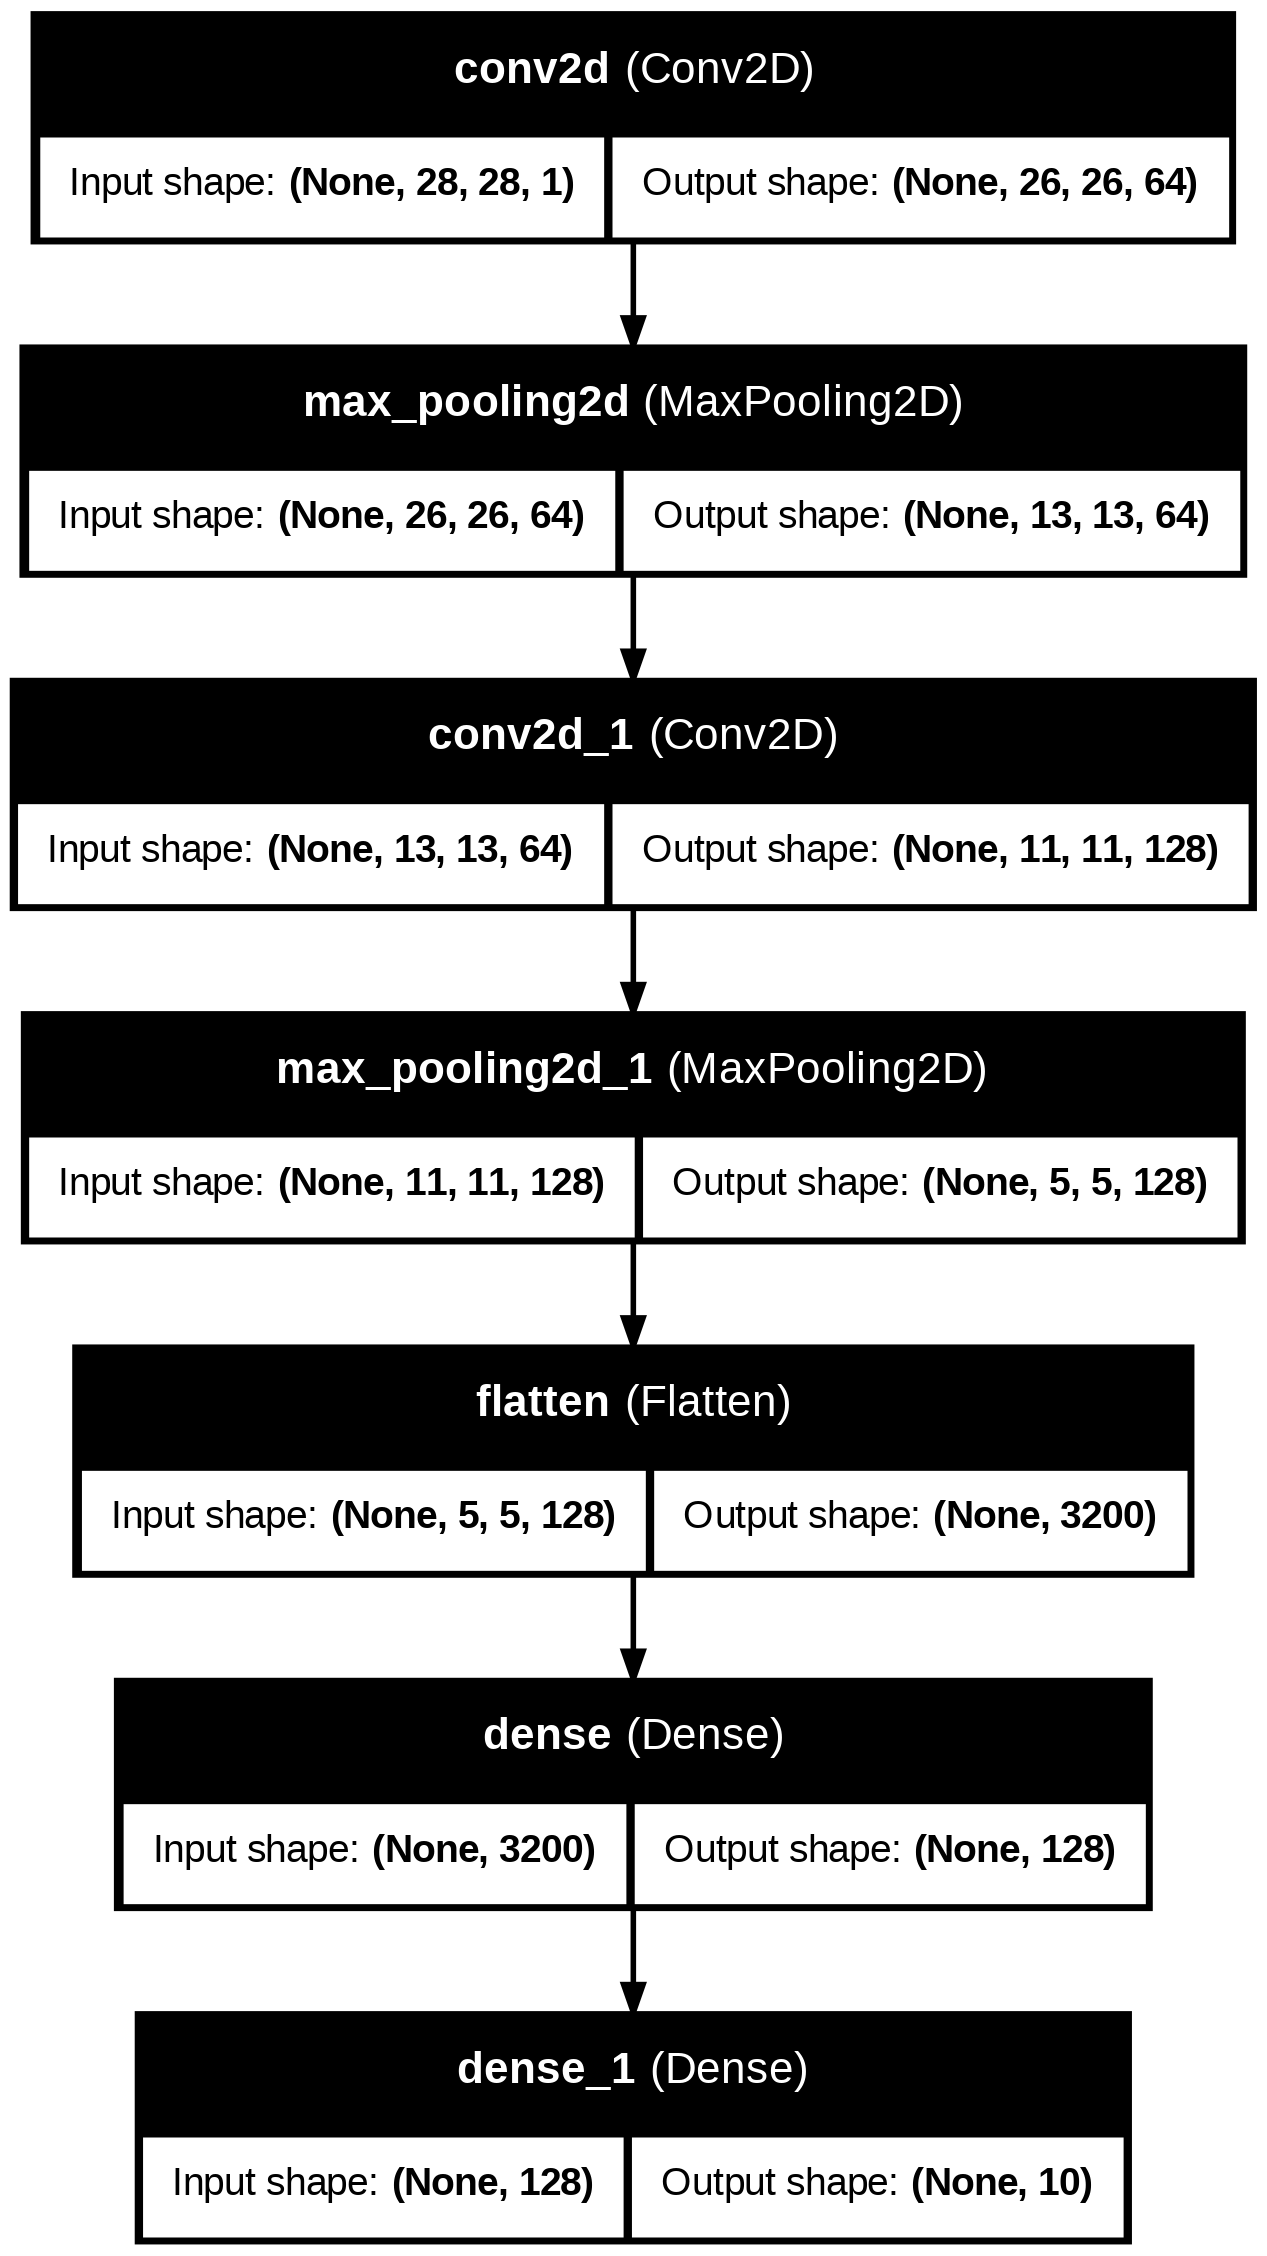

In [18]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [19]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 116s 136ms/step - accuracy: 0.7628 - loss: 0.6576 - val_accuracy: 0.8773 - val_loss: 0.3443
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 113s 134ms/step - accuracy: 0.8859 - loss: 0.3140 - val_accuracy: 0.8977 - val_loss: 0.2850
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 116s 137ms/step - accuracy: 0.9036 - loss: 0.2616 - val_accuracy: 0.9023 - val_loss: 0.2656
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 138s 133ms/step - accuracy: 0.9166 - loss: 0.2255 - val_accuracy: 0.9078 - val_loss: 0.2540
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 115s 137ms/step - accuracy: 0.9260 - loss: 0.1997 - val_accuracy: 0.9007 - val_loss: 0.2650


In [20]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8918 - loss: 0.2953


In [33]:
loss

0.28233566880226135

In [34]:
accuracy

0.8964999914169312

In [21]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [ ]:
y_test[0]

In [23]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000221956%
1: 0.0000025401%
2: 0.0000081035%
3: 0.0000007046%
4: 0.0000054240%
5: 0.0663591432%
6: 0.0000901068%
7: 0.0186787089%
8: 0.0001945857%
9: 99.9146401882%


In [24]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append((i, images[i], predicted, expected))

In [25]:
len(incorrect_predictions)

1035

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

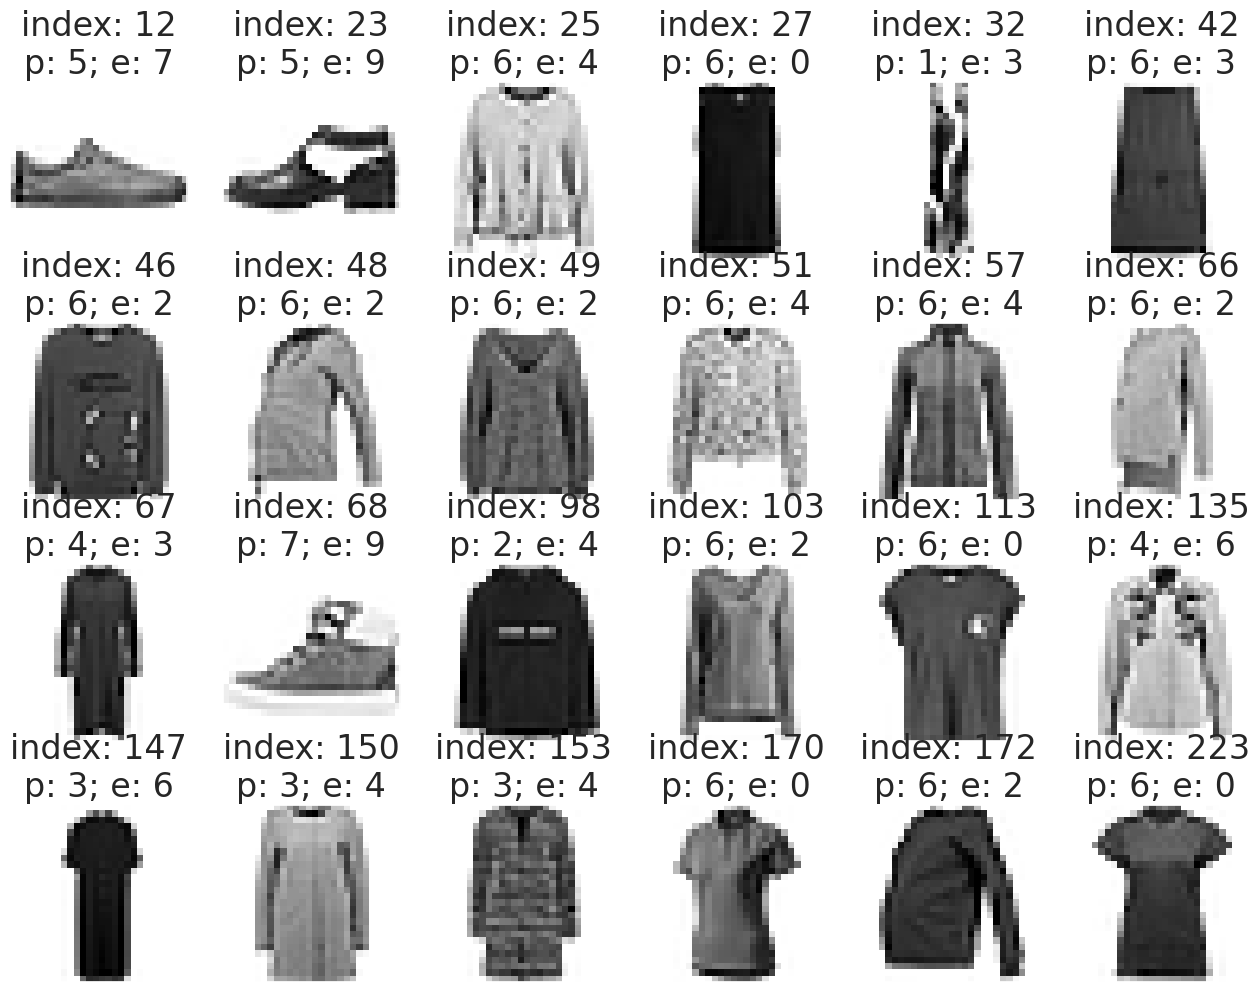

In [26]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout

In [27]:
def display_probabilites(prediction):
  for index, probability in enumerate(prediction):
    print(f'{index}: {probability:.10%}')

In [28]:
# View probability for index 271
display_probabilites(predictions[271])

0: 1.1756254360%
1: 0.0151724365%
2: 0.0986072584%
3: 75.1634716988%
4: 0.5650129169%
5: 0.0003956779%
6: 22.8732392192%
7: 0.0027196973%
8: 0.1056757523%
9: 0.0000795366%


In [29]:
# View probability for index 244
display_probabilites(predictions[244])

0: 0.0050462633%
1: 0.0000019199%
2: 97.1042096615%
3: 0.0016528844%
4: 1.5805928037%
5: 0.0000000091%
6: 1.3084799051%
7: 0.0000000016%
8: 0.0000077429%
9: 0.0000004050%


In [30]:
cnn.save('mnist_cnn.h5')

In [55]:
# Import libary to make print bold
from IPython.display import display, Markdown

print()
print()
display(Markdown(f"**Test Accuracy for the Fashion-MNIST dataset is: {accuracy * 100:.2f}%**"))
display(Markdown("**Test Accuracy for the MNIST dataset (according to the textbook example) is: {:.2f}%**".format(0.9917 * 100)))
print()
display(Markdown('**CNN generally performs better on MNIST than Fashion-MNIST as it achieves very high accuracy, almost a perfect score. This makes sense since Fashion-MNIST is more complex, working with clothing images in comparison to digits.**'))


**Test Accuracy for the Fashion-MNIST dataset is: 89.65%**

**Test Accuracy for the MNIST dataset (according to the textbook example) is: 99.17%**

**CNN generally performs better on MNIST than Fashion-MNIST as it achieves very high accuracy, almost a perfect score. This makes sense since Fashion-MNIST is more complex, working with clothing images in comparison to digits.**

In [46]:
# MNIST data training
(x_train_mnist, y_train_mnist), _ = load_and_preprocess('mnist')
mnist_time, mnist_model = train_and_time(x_train_mnist, y_train_mnist)

# Fashion-MNIST data training
(x_train_fashion, y_train_fashion), _ = load_and_preprocess('fashion_mnist')
fashion_time, fashion_model = train_and_time(x_train_fashion, y_train_fashion)
print()
print()
display(Markdown(f"**The training time on MNIST is: {mnist_time:.2f} seconds**"))
display(Markdown(f"**The training time on Fashion-MNIST is: {fashion_time:.2f} seconds**"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 - 45s - 54ms/step - accuracy: 0.9428 - loss: 0.1894 - val_accuracy: 0.9855 - val_loss: 0.0519
Epoch 2/5
844/844 - 42s - 49ms/step - accuracy: 0.9831 - loss: 0.0544 - val_accuracy: 0.9870 - val_loss: 0.0434
Epoch 3/5
844/844 - 42s - 49ms/step - accuracy: 0.9882 - loss: 0.0386 - val_accuracy: 0.9880 - val_loss: 0.0446
Epoch 4/5
844/844 - 81s - 95ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9872 - val_loss: 0.0462
Epoch 5/5
844/844 - 42s - 50ms/step - accuracy: 0.9922 - loss: 0.0238 - val_accuracy: 0.9908 - val_loss: 0.0334
Epoch 1/5
844/844 - 43s - 51ms/step - accuracy: 0.8179 - loss: 0.5067 - val_accuracy: 0.8712 - val_loss: 0.3516
Epoch 2/5
844/844 - 41s - 48ms/step - accuracy: 0.8791 - loss: 0.3374 - val_accuracy: 0.8857 - val_loss: 0.3091
Epoch 3/5
844/844 - 42s - 50ms/step - accuracy: 0.8935 - loss: 0.2913 - val_accuracy: 0.8938 - val_loss: 0.2865
Epoch 4/5
844/844 - 41s - 48ms/step - accuracy: 0.9031 - loss: 0.2633 - val_accuracy: 0.8993 - val_loss: